In [ ]:
Process:
1. Download the dataset from net as a csv file
2. Install the pyspark on the windows
3. Import the required libraries and modules.
4. Cleaning the dataset
5. Analyzing the dataset
6. Splitting the dataset into training and testing and applying the necessary classification algorithms we need
7. Summarizing the performance of the prediction model using precision,recall and accuracy

Mathematical Algorithm:
# Logistic Regression is twist On regresion for categorical where instead of solving mean logistics Solve probability of class y 
    log(E(y|x)) = Bo + summ(BjXj)
# The odds ration of probability p is measure of how many times more likely it is more than the inverse \
    odss ratio =P/1-P 
# Using odd ratio the sigmoid function is obtained by assigning y=e^( Bo+B1+x) p(x) = 1/1+e^-(Bo+B1x)
# p=1/1+e^-xTo
# P(y=1|x=x) = o-(o^Tx)
#  P(y=0|x=x) = 1-o-(o^Tx)
# CALCULATE LOG
    LL(o)=summ(i=0 to n)[y^i-o-(o^T.x^i)]x^(1)
# differentiate the above wrt to o which will contain the actual and predicted values fropm the data

# SVM
# choose A dataste
# preprocess the dataset and remove irregularities and null values
# split the dataset into train and test
# fit and train the model
# Evaluate the trained model using test data
# calculate the necessary metriocs and visualize the data
# y=w^tx+b
# positive class -> w^tx1+b = 1
# negative class -> w^tx2+b = -1
# w^t(x1-x2)=2
# w^t(x1-x2)/||w||=2/||w||
# y1={1, W^t.Xi+b>=1
# ={-1, W^t.Xi+b<=-1
# w`= summ(i=1 to n)ai.Si
# y=wx+b


# LR_SVM_DT.csv

Spark Version: 3.5.3
+--------+------+---+---------------+---------+
| User ID|Gender|Age|EstimatedSalary|Purchased|
+--------+------+---+---------------+---------+
|15624510|  Male| 19|          19000|        0|
|15810944|  Male| 35|          20000|        0|
|15668575|Female| 26|          43000|        0|
|15603246|Female| 27|          57000|        0|
|15804002|  Male| 19|          76000|        0|
|15728773|  Male| 27|          58000|        0|
|15598044|Female| 27|          84000|        0|
|15694829|Female| 32|         150000|        1|
|15600575|  Male| 25|          33000|        0|
|15727311|Female| 35|          65000|        0|
+--------+------+---+---------------+---------+
only showing top 10 rows

root
 |-- User ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- EstimatedSalary: integer (nullable = true)
 |-- Purchased: integer (nullable = true)

+-------------------+---------+
|           features|Purchased|
+------

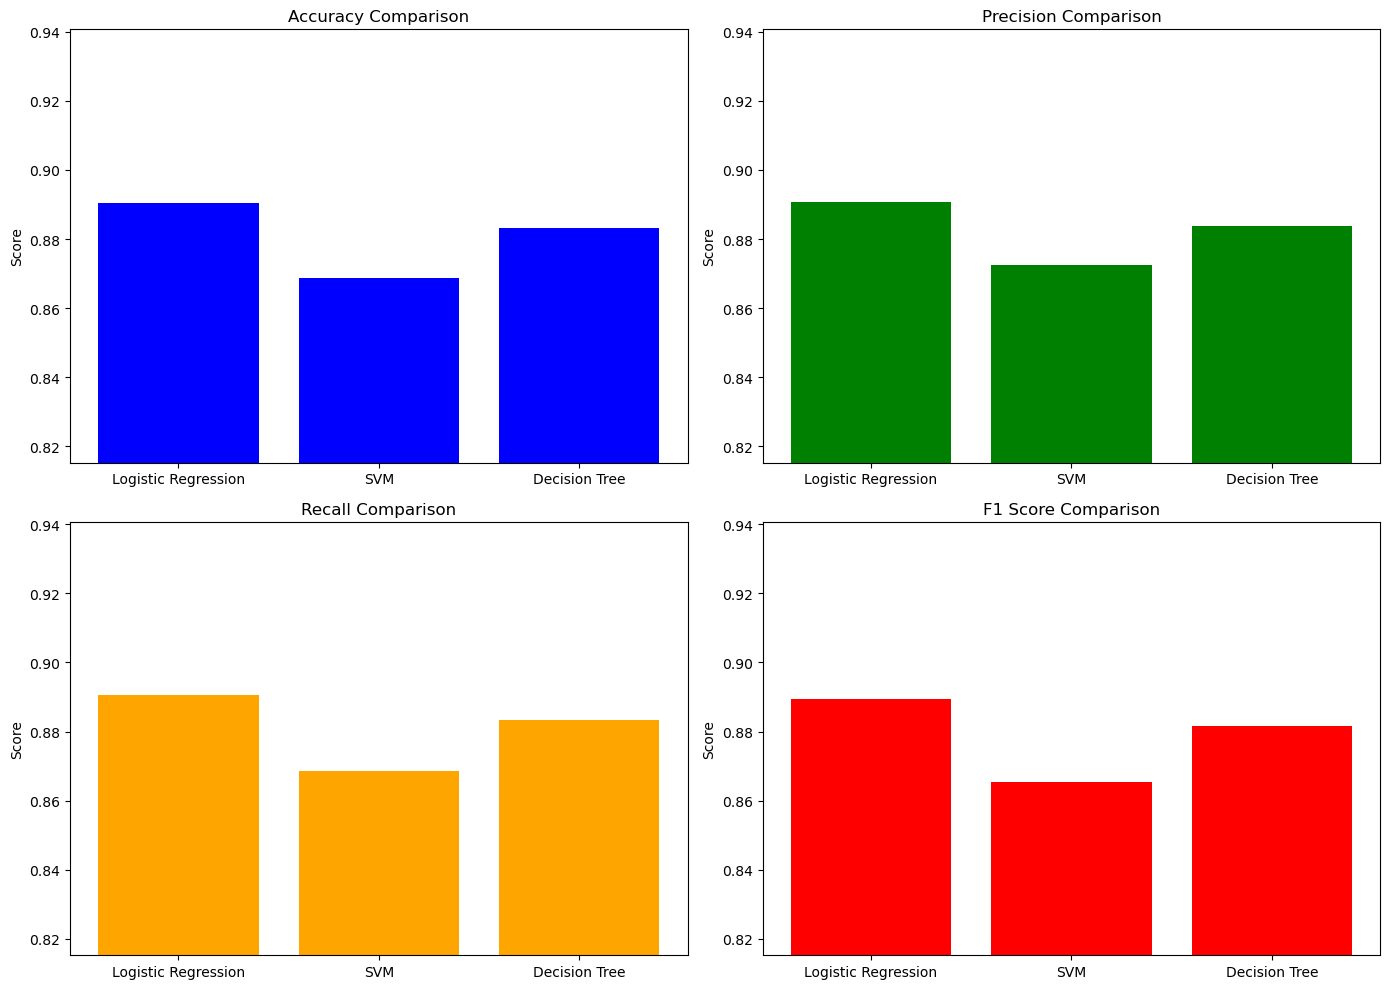

In [1]:
from pyspark.sql import SparkSession
# Initialize Spark Session
spark = SparkSession.builder.appName('Purchase_Classification').getOrCreate()
print('Spark Version:', spark.version)

# Load the dataset
dataset = spark.read.csv(r'LR_SVM_DT.csv', header=True, inferSchema=True)
dataset.show(10)
dataset.printSchema()

from pyspark.sql.functions import col
# Selecting relevant features and dropping rows with missing values
data = dataset.select(
    col("Gender").cast("string"),
    col("Age").cast("double"),
    col("EstimatedSalary").cast("double"),
    col("Purchased").cast("double")
).na.drop()

# Convert categorical column 'Gender' to numerical
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
data = indexer.fit(data).transform(data)

# Assembling features
from pyspark.ml.feature import VectorAssembler
vec_assembler = VectorAssembler(inputCols=["GenderIndex", "Age", "EstimatedSalary"], outputCol='features')
final_data = vec_assembler.transform(data)

# Select final data for modeling
final_data = final_data.select("features", "Purchased")
final_data.show(10)

# Splitting the data into training and testing sets
train_data, test_data = final_data.randomSplit([0.7, 0.3])

# Logistic Regression
from pyspark.ml.classification import LogisticRegression
log_reg = LogisticRegression(labelCol="Purchased", featuresCol="features")
log_reg_model = log_reg.fit(train_data)
log_reg_predictions = log_reg_model.transform(test_data)

# Evaluating Logistic Regression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Purchased", predictionCol="prediction")
log_reg_accuracy = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "accuracy"})
log_reg_precision = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedPrecision"})
log_reg_recall = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedRecall"})
log_reg_f1 = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "f1"})
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Logistic Regression Precision: {log_reg_precision}")
print(f"Logistic Regression Recall: {log_reg_recall}")
print(f"Logistic Regression F1 Score: {log_reg_f1}")

# Support Vector Machine
from pyspark.ml.classification import LinearSVC
svm = LinearSVC(labelCol="Purchased", featuresCol="features")
svm_model = svm.fit(train_data)
svm_predictions = svm_model.transform(test_data)

# Evaluating SVM
svm_accuracy = evaluator.evaluate(svm_predictions, {evaluator.metricName: "accuracy"})
svm_precision = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedPrecision"})
svm_recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedRecall"})
svm_f1 = evaluator.evaluate(svm_predictions, {evaluator.metricName: "f1"})
print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
print(f"SVM F1 Score: {svm_f1}")

# Decision Tree Classifier
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="Purchased", featuresCol="features")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Evaluating Decision Tree
dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Precision: {dt_precision}")
print(f"Decision Tree Recall: {dt_recall}")
print(f"Decision Tree F1 Score: {dt_f1}")

# Comparing Accuracy, Precision, Recall, and F1-Score
import matplotlib.pyplot as plt

methods = ["Logistic Regression", "SVM", "Decision Tree"]
accuracy = [log_reg_accuracy, svm_accuracy, dt_accuracy]
precision = [log_reg_precision, svm_precision, dt_precision]
recall = [log_reg_recall, svm_recall, dt_recall]
f1_score = [log_reg_f1, svm_f1, dt_f1]

# Set figure size
plt.figure(figsize=(14, 10))
y_max = max(max(accuracy), max(precision), max(recall), max(f1_score)) + 0.05
y_min = min(min(accuracy), min(precision), min(recall), min(f1_score)) - 0.05

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.bar(methods, accuracy, color='blue')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Accuracy Comparison')

# Plot Precision
plt.subplot(2, 2, 2)
plt.bar(methods, precision, color='green')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Precision Comparison')

# Plot Recall
plt.subplot(2, 2, 3)
plt.bar(methods, recall, color='orange')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Recall Comparison')

# Plot F1 Score
plt.subplot(2, 2, 4)
plt.bar(methods, f1_score, color='red')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()

# Stop the Spark Session
spark.stop()

# cars_dataset-SVM.csv

Spark Version: 3.5.3
+------+-----+-----+-------+--------+------+-----+
|buying|maint|doors|persons|lug_boot|safety|  car|
+------+-----+-----+-------+--------+------+-----+
| vhigh|vhigh|  two|    two|   small|   low|unacc|
| vhigh|vhigh|  two|    two|   small|   med|unacc|
| vhigh|vhigh|  two|    two|   small|  high|unacc|
| vhigh|vhigh|  two|    two|     med|   low|unacc|
| vhigh|vhigh|  two|    two|     med|   med|unacc|
| vhigh|vhigh|  two|    two|     med|  high|unacc|
| vhigh|vhigh|  two|    two|     big|   low|unacc|
| vhigh|vhigh|  two|    two|     big|   med|unacc|
| vhigh|vhigh|  two|    two|     big|  high|unacc|
| vhigh| high|  two|    two|   small|   low|unacc|
+------+-----+-----+-------+--------+------+-----+
only showing top 10 rows

root
 |-- buying: string (nullable = true)
 |-- maint: string (nullable = true)
 |-- doors: string (nullable = true)
 |-- persons: string (nullable = true)
 |-- lug_boot: string (nullable = true)
 |-- safety: string (nullable = true)
 |-- 

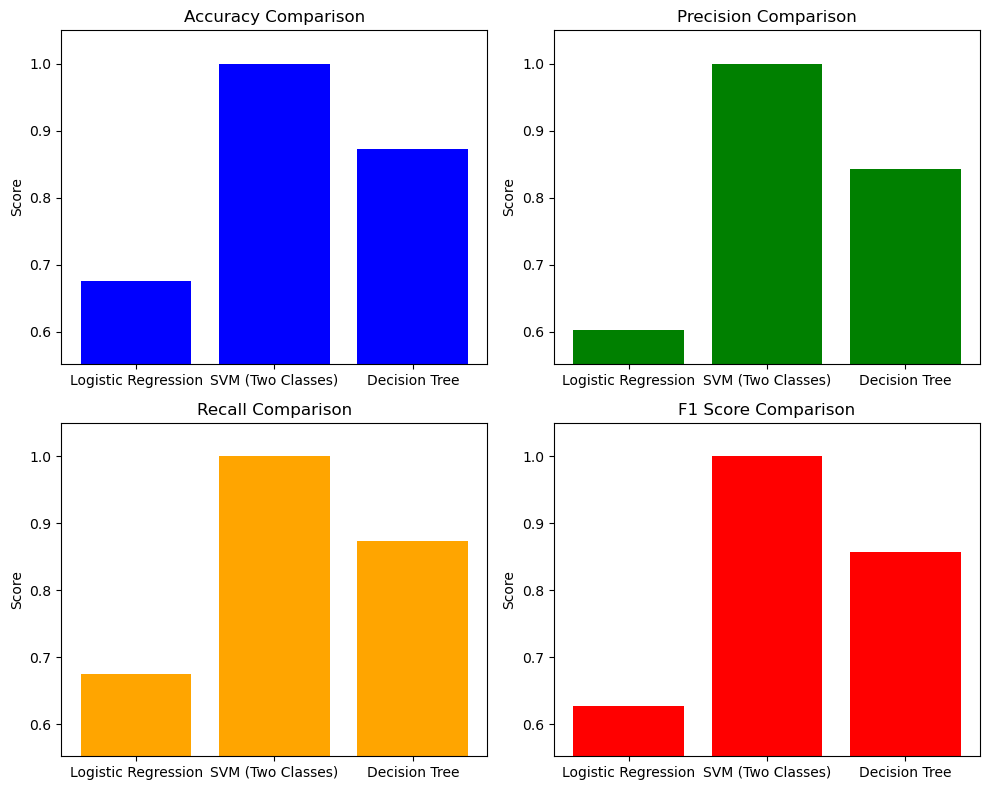

In [22]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

# Initialize Spark Session
spark = SparkSession.builder.appName("Car_Classification").getOrCreate()
print("Spark Version:", spark.version)

# Load the dataset
dataset = spark.read.csv("cars_dataset-SVM.csv", header=True, inferSchema=True)
dataset.show(10)
dataset.printSchema()

# Select and clean relevant features
data = dataset.select(
    col("buying").cast("string"),
    col("maint").cast("string"),
    col("doors").cast("string"),
    col("persons").cast("string"),
    col("lug_boot").cast("string"),
    col("safety").cast("string"),
    col("car").cast("string")
)

# Convert categorical columns to indexed values
indexers = [StringIndexer(inputCol=column, outputCol=column + "_index").fit(data) for column in ["buying", "maint", "doors", "persons", "lug_boot", "safety", "car"]]
for indexer in indexers:
    data = indexer.transform(data)

# Assemble features into a vector
vec_assembler = VectorAssembler(
    inputCols=["buying_index", "maint_index", "doors_index", "persons_index", "lug_boot_index", "safety_index"],
    outputCol="features"
)
final_data = vec_assembler.transform(data).select("features", col("car_index").alias("label"))


# Split the data into training and testing sets for other models
train_data, test_data = final_data.randomSplit([0.7, 0.3])

# Evaluator for models
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Logistic Regression
log_reg = LogisticRegression(labelCol="label", featuresCol="features")
log_reg_model = log_reg.fit(train_data)
log_reg_predictions = log_reg_model.transform(test_data)

# Logistic Regression Evaluation
log_reg_accuracy = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "accuracy"})
log_reg_precision = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedPrecision"})
log_reg_recall = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedRecall"})
log_reg_f1 = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "f1"})


# Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Decision Tree Evaluation
dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})

# Print Results
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Logistic Regression Precision: {log_reg_precision}")
print(f"Logistic Regression Recall: {log_reg_recall}")
print(f"Logistic Regression F1 Score: {log_reg_f1}")

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Precision: {dt_precision}")
print(f"Decision Tree Recall: {dt_recall}")
print(f"Decision Tree F1 Score: {dt_f1}")

# Visualization
methods = ["Logistic Regression", "SVM (Two Classes)", "Decision Tree"]
accuracy = [log_reg_accuracy, svm_accuracy, dt_accuracy]
precision = [log_reg_precision, svm_precision, dt_precision]
recall = [log_reg_recall, svm_recall, dt_recall]
f1_score = [log_reg_f1, svm_f1, dt_f1]

plt.figure(figsize=(10, 8))
y_max = max(max(accuracy), max(precision), max(recall), max(f1_score)) + 0.05
y_min = min(min(accuracy), min(precision), min(recall), min(f1_score)) - 0.05

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.bar(methods, accuracy, color="blue")
plt.ylim(y_min, y_max)
plt.ylabel("Score")
plt.title("Accuracy Comparison")

# Plot Precision
plt.subplot(2, 2, 2)
plt.bar(methods, precision, color="green")
plt.ylim(y_min, y_max)
plt.ylabel("Score")
plt.title("Precision Comparison")

# Plot Recall
plt.subplot(2, 2, 3)
plt.bar(methods, recall, color="orange")
plt.ylim(y_min, y_max)
plt.ylabel("Score")
plt.title("Recall Comparison")

# Plot F1 Score
plt.subplot(2, 2, 4)
plt.bar(methods, f1_score, color="red")
plt.ylim(y_min, y_max)
plt.ylabel("Score")
plt.title("F1 Score Comparison")

plt.tight_layout()
plt.show()

# Stop the Spark session
spark.stop()


Spark Version: 3.5.3
+------+-----+-----+-------+--------+------+-----+
|buying|maint|doors|persons|lug_boot|safety|  car|
+------+-----+-----+-------+--------+------+-----+
| vhigh|vhigh|  two|    two|   small|   low|unacc|
| vhigh|vhigh|  two|    two|   small|   med|unacc|
| vhigh|vhigh|  two|    two|   small|  high|unacc|
| vhigh|vhigh|  two|    two|     med|   low|unacc|
| vhigh|vhigh|  two|    two|     med|   med|unacc|
| vhigh|vhigh|  two|    two|     med|  high|unacc|
| vhigh|vhigh|  two|    two|     big|   low|unacc|
| vhigh|vhigh|  two|    two|     big|   med|unacc|
| vhigh|vhigh|  two|    two|     big|  high|unacc|
| vhigh| high|  two|    two|   small|   low|unacc|
+------+-----+-----+-------+--------+------+-----+
only showing top 10 rows

root
 |-- buying: string (nullable = true)
 |-- maint: string (nullable = true)
 |-- doors: string (nullable = true)
 |-- persons: string (nullable = true)
 |-- lug_boot: string (nullable = true)
 |-- safety: string (nullable = true)
 |-- 

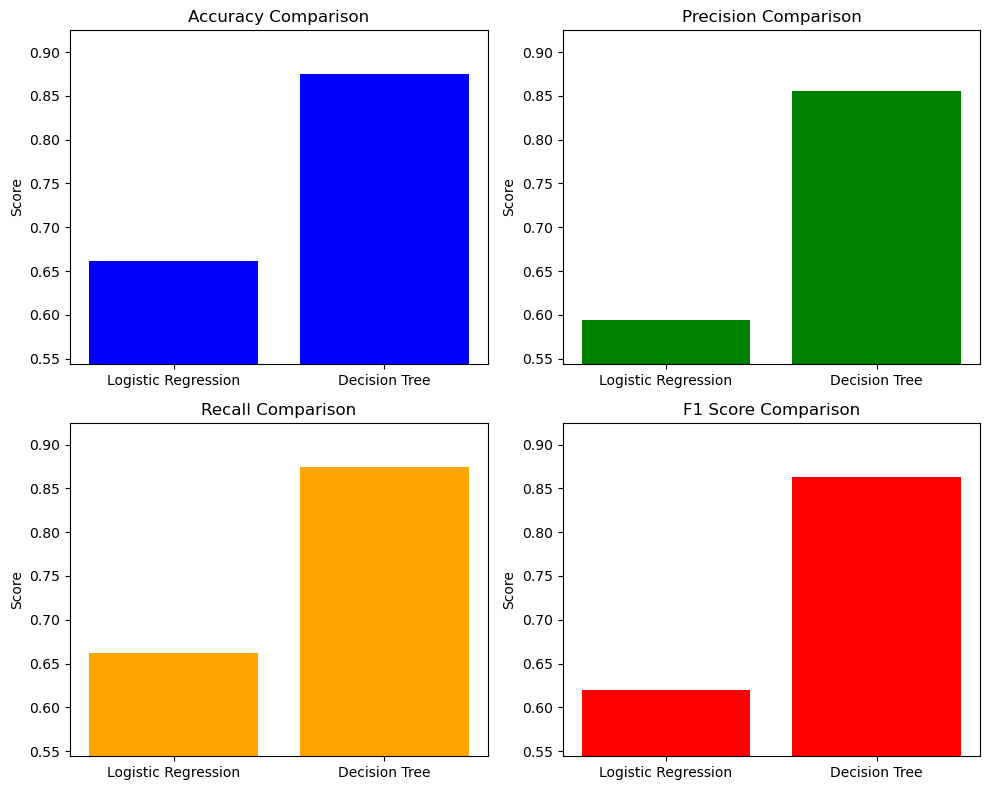

In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

# Initialize Spark Session
spark = SparkSession.builder.appName("Car_Classification").getOrCreate()
print("Spark Version:", spark.version)

# Load the dataset
dataset = spark.read.csv("cars_dataset-SVM.csv", header=True, inferSchema=True)
dataset.show(10)
dataset.printSchema()

# Select and clean relevant features
data = dataset.select(
    col("buying").cast("string"),
    col("maint").cast("string"),
    col("doors").cast("string"),
    col("persons").cast("string"),
    col("lug_boot").cast("string"),
    col("safety").cast("string"),
    col("car").cast("string")
)

# Convert categorical columns to indexed values
indexers = [StringIndexer(inputCol=column, outputCol=column + "_index").fit(data) for column in ["buying", "maint", "doors", "persons", "lug_boot", "safety", "car"]]
for indexer in indexers:
    data = indexer.transform(data)

# Assemble features into a vector
vec_assembler = VectorAssembler(
    inputCols=["buying_index", "maint_index", "doors_index", "persons_index", "lug_boot_index", "safety_index"],
    outputCol="features"
)
final_data = vec_assembler.transform(data).select("features", col("car_index").alias("label"))
final_data.show(10)

# Split the data into training and testing sets
train_data, test_data = final_data.randomSplit([0.7, 0.3])

# Evaluator for models
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Logistic Regression
log_reg = LogisticRegression(labelCol="label", featuresCol="features")
log_reg_model = log_reg.fit(train_data)
log_reg_predictions = log_reg_model.transform(test_data)

# Logistic Regression Evaluation
log_reg_accuracy = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "accuracy"})
log_reg_precision = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedPrecision"})
log_reg_recall = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedRecall"})
log_reg_f1 = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "f1"})

# Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Decision Tree Evaluation
dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})

# Print Results
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Logistic Regression Precision: {log_reg_precision}")
print(f"Logistic Regression Recall: {log_reg_recall}")
print(f"Logistic Regression F1 Score: {log_reg_f1}")

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Precision: {dt_precision}")
print(f"Decision Tree Recall: {dt_recall}")
print(f"Decision Tree F1 Score: {dt_f1}")

# Visualization
methods = ["Logistic Regression", "Decision Tree"]
accuracy = [log_reg_accuracy, dt_accuracy]
precision = [log_reg_precision, dt_precision]
recall = [log_reg_recall, dt_recall]
f1_score = [log_reg_f1, dt_f1]

plt.figure(figsize=(10, 8))
y_max = max(max(accuracy), max(precision), max(recall), max(f1_score)) + 0.05
y_min = min(min(accuracy), min(precision), min(recall), min(f1_score)) - 0.05

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.bar(methods, accuracy, color="blue")
plt.ylim(y_min, y_max)
plt.ylabel("Score")
plt.title("Accuracy Comparison")

# Plot Precision
plt.subplot(2, 2, 2)
plt.bar(methods, precision, color="green")
plt.ylim(y_min, y_max)
plt.ylabel("Score")
plt.title("Precision Comparison")

# Plot Recall
plt.subplot(2, 2, 3)
plt.bar(methods, recall, color="orange")
plt.ylim(y_min, y_max)
plt.ylabel("Score")
plt.title("Recall Comparison")

# Plot F1 Score
plt.subplot(2, 2, 4)
plt.bar(methods, f1_score, color="red")
plt.ylim(y_min, y_max)
plt.ylabel("Score")
plt.title("F1 Score Comparison")

plt.tight_layout()
plt.show()

# Stop the Spark session
spark.stop()


# Logistic regression dataset-Social_Network_Ads.csv

Spark Version: 3.5.3
+--------+------+---+---------------+---------+
| User ID|Gender|Age|EstimatedSalary|Purchased|
+--------+------+---+---------------+---------+
|15624510|  Male| 19|          19000|        0|
|15810944|  Male| 35|          20000|        0|
|15668575|Female| 26|          43000|        0|
|15603246|Female| 27|          57000|        0|
|15804002|  Male| 19|          76000|        0|
|15728773|  Male| 27|          58000|        0|
|15598044|Female| 27|          84000|        0|
|15694829|Female| 32|         150000|        1|
|15600575|  Male| 25|          33000|        0|
|15727311|Female| 35|          65000|        0|
+--------+------+---+---------------+---------+
only showing top 10 rows

root
 |-- User ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- EstimatedSalary: integer (nullable = true)
 |-- Purchased: integer (nullable = true)

+-------------------+---------+
|           features|Purchased|
+------

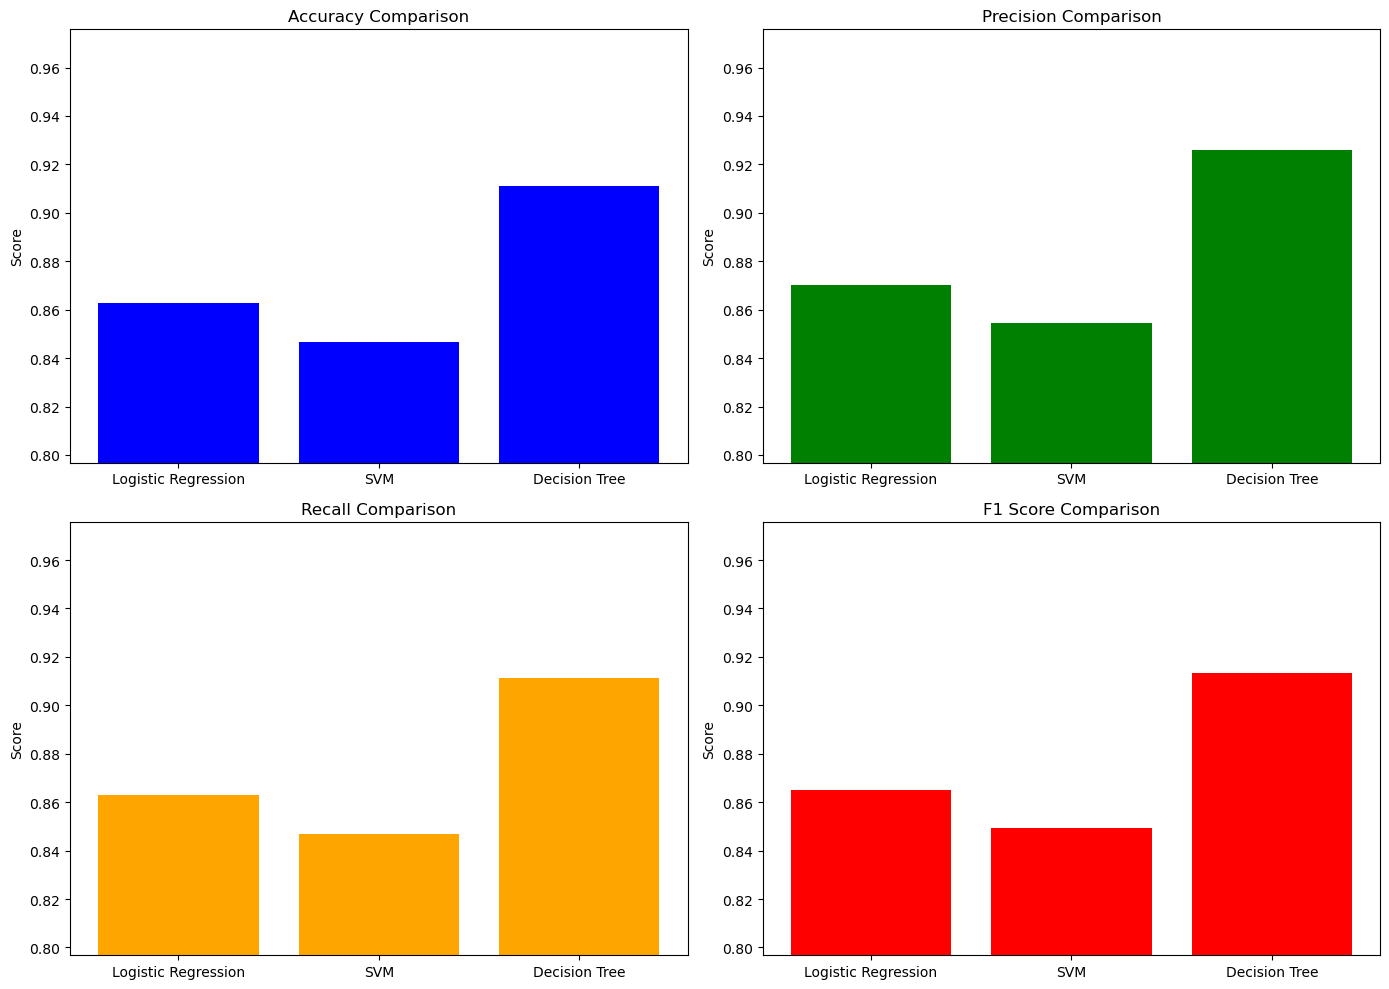

In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression, LinearSVC, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

# Initialize Spark Session
spark = SparkSession.builder.appName('Purchase_Classification').getOrCreate()
print('Spark Version:', spark.version)

# Load the dataset
dataset = spark.read.csv("Logistic regression dataset-Social_Network_Ads.csv", header=True, inferSchema=True)
dataset.show(10)
dataset.printSchema()

# Select and clean relevant features
data = dataset.select(
    col("Gender").cast("string"),
    col("Age").cast("double"),
    col("EstimatedSalary").cast("double"),
    col("Purchased").cast("double")
).na.drop()

# Convert categorical 'Gender' column to numerical
indexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
data = indexer.fit(data).transform(data)

# Assemble features
vec_assembler = VectorAssembler(inputCols=["GenderIndex", "Age", "EstimatedSalary"], outputCol='features')
final_data = vec_assembler.transform(data)

# Select final data for modeling
final_data = final_data.select("features", "Purchased")
final_data.show(10)

# Split the data into training and testing sets
train_data, test_data = final_data.randomSplit([0.7, 0.3])

# Evaluator for models
evaluator = MulticlassClassificationEvaluator(labelCol="Purchased", predictionCol="prediction")

# Logistic Regression
log_reg = LogisticRegression(labelCol="Purchased", featuresCol="features")
log_reg_model = log_reg.fit(train_data)
log_reg_predictions = log_reg_model.transform(test_data)

# Logistic Regression Evaluation
log_reg_accuracy = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "accuracy"})
log_reg_precision = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedPrecision"})
log_reg_recall = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedRecall"})
log_reg_f1 = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "f1"})

# Support Vector Machine
svm = LinearSVC(labelCol="Purchased", featuresCol="features")
svm_model = svm.fit(train_data)
svm_predictions = svm_model.transform(test_data)

# SVM Evaluation
svm_accuracy = evaluator.evaluate(svm_predictions, {evaluator.metricName: "accuracy"})
svm_precision = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedPrecision"})
svm_recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedRecall"})
svm_f1 = evaluator.evaluate(svm_predictions, {evaluator.metricName: "f1"})

# Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol="Purchased", featuresCol="features")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Decision Tree Evaluation
dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})

# Print Results
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Logistic Regression Precision: {log_reg_precision}")
print(f"Logistic Regression Recall: {log_reg_recall}")
print(f"Logistic Regression F1 Score: {log_reg_f1}")

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
print(f"SVM F1 Score: {svm_f1}")

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Precision: {dt_precision}")
print(f"Decision Tree Recall: {dt_recall}")
print(f"Decision Tree F1 Score: {dt_f1}")

# Visualization
methods = ["Logistic Regression", "SVM", "Decision Tree"]
accuracy = [log_reg_accuracy, svm_accuracy, dt_accuracy]
precision = [log_reg_precision, svm_precision, dt_precision]
recall = [log_reg_recall, svm_recall, dt_recall]
f1_score = [log_reg_f1, svm_f1, dt_f1]

plt.figure(figsize=(14, 10))
y_max = max(max(accuracy), max(precision), max(recall), max(f1_score)) + 0.05
y_min = min(min(accuracy), min(precision), min(recall), min(f1_score)) - 0.05

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.bar(methods, accuracy, color='blue')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Accuracy Comparison')

# Plot Precision
plt.subplot(2, 2, 2)
plt.bar(methods, precision, color='green')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Precision Comparison')

# Plot Recall
plt.subplot(2, 2, 3)
plt.bar(methods, recall, color='orange')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Recall Comparison')

# Plot F1 Score
plt.subplot(2, 2, 4)
plt.bar(methods, f1_score, color='red')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()

# Stop the Spark session
spark.stop()


# Heart-Logistic regression.csv

Spark Version: 3.5.3
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 52|  1|  0|     125| 212|  0|      1|    168|    0|    1.0|    2|  2|   3|     0|
| 53|  1|  0|     140| 203|  1|      0|    155|    1|    3.1|    0|  0|   3|     0|
| 70|  1|  0|     145| 174|  0|      1|    125|    1|    2.6|    0|  0|   3|     0|
| 61|  1|  0|     148| 203|  0|      1|    161|    0|    0.0|    2|  1|   3|     0|
| 62|  0|  0|     138| 294|  1|      1|    106|    0|    1.9|    1|  3|   2|     0|
| 58|  0|  0|     100| 248|  0|      0|    122|    0|    1.0|    1|  0|   2|     1|
| 58|  1|  0|     114| 318|  0|      2|    140|    0|    4.4|    0|  3|   1|     0|
| 55|  1|  0|     160| 289|  0|      0|    145|    1|    0.8|    1|  1|   3|     0|
| 46|  1|  0|     120| 249|  0|      0|    144|    0|  

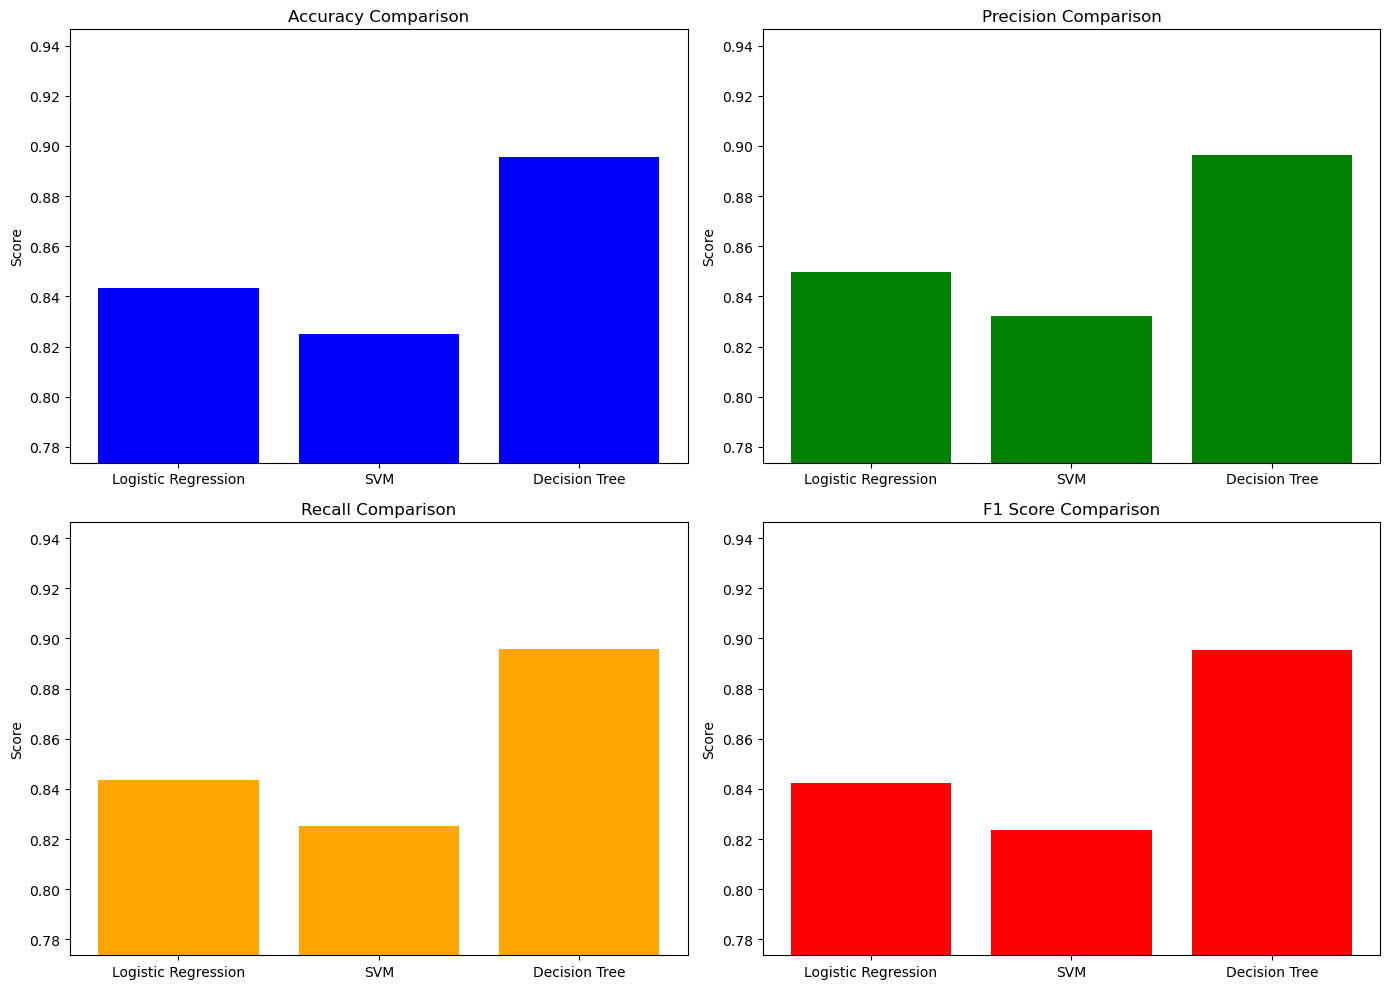

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression, LinearSVC, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

# Initialize Spark Session
spark = SparkSession.builder.appName('Heart_Disease_Classification').getOrCreate()
print('Spark Version:', spark.version)

# Load the dataset
dataset = spark.read.csv("Heart-Logistic regression.csv", header=True, inferSchema=True)
dataset.show(10)
dataset.printSchema()

# Select and clean relevant features (adjust column names as per the dataset)
data = dataset.select(
    col("age").cast("double"),
    col("sex").cast("double"),
    col("cp").cast("double"),
    col("trestbps").cast("double"),
    col("chol").cast("double"),
    col("fbs").cast("double"),
    col("restecg").cast("double"),
    col("thalach").cast("double"),
    col("exang").cast("double"),
    col("oldpeak").cast("double"),
    col("slope").cast("double"),
    col("ca").cast("double"),
    col("thal").cast("double"),
    col("target").cast("double")
).na.drop()

# Assemble features into a vector
vec_assembler = VectorAssembler(
    inputCols=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", 
               "oldpeak", "slope", "ca", "thal"],
    outputCol='features'
)
final_data = vec_assembler.transform(data)

# Select final data for modeling
final_data = final_data.select("features", "target")
final_data.show(10)

# Split the data into training and testing sets
train_data, test_data = final_data.randomSplit([0.7, 0.3])

# Evaluator for models
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction")

# Logistic Regression
log_reg = LogisticRegression(labelCol="target", featuresCol="features")
log_reg_model = log_reg.fit(train_data)
log_reg_predictions = log_reg_model.transform(test_data)

# Logistic Regression Evaluation
log_reg_accuracy = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "accuracy"})
log_reg_precision = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedPrecision"})
log_reg_recall = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedRecall"})
log_reg_f1 = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "f1"})

# Support Vector Machine
svm = LinearSVC(labelCol="target", featuresCol="features")
svm_model = svm.fit(train_data)
svm_predictions = svm_model.transform(test_data)

# SVM Evaluation
svm_accuracy = evaluator.evaluate(svm_predictions, {evaluator.metricName: "accuracy"})
svm_precision = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedPrecision"})
svm_recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedRecall"})
svm_f1 = evaluator.evaluate(svm_predictions, {evaluator.metricName: "f1"})

# Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol="target", featuresCol="features")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Decision Tree Evaluation
dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})

# Print Results
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Logistic Regression Precision: {log_reg_precision}")
print(f"Logistic Regression Recall: {log_reg_recall}")
print(f"Logistic Regression F1 Score: {log_reg_f1}")

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
print(f"SVM F1 Score: {svm_f1}")

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Precision: {dt_precision}")
print(f"Decision Tree Recall: {dt_recall}")
print(f"Decision Tree F1 Score: {dt_f1}")

# Visualization
methods = ["Logistic Regression", "SVM", "Decision Tree"]
accuracy = [log_reg_accuracy, svm_accuracy, dt_accuracy]
precision = [log_reg_precision, svm_precision, dt_precision]
recall = [log_reg_recall, svm_recall, dt_recall]
f1_score = [log_reg_f1, svm_f1, dt_f1]

plt.figure(figsize=(14, 10))
y_max = max(max(accuracy), max(precision), max(recall), max(f1_score)) + 0.05
y_min = min(min(accuracy), min(precision), min(recall), min(f1_score)) - 0.05

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.bar(methods, accuracy, color='blue')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Accuracy Comparison')

# Plot Precision
plt.subplot(2, 2, 2)
plt.bar(methods, precision, color='green')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Precision Comparison')

# Plot Recall
plt.subplot(2, 2, 3)
plt.bar(methods, recall, color='orange')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Recall Comparison')

# Plot F1 Score
plt.subplot(2, 2, 4)
plt.bar(methods, f1_score, color='red')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()

# Stop the Spark session
spark.stop()


#  diabetes_dataset-Decision tree.csv

Spark Version: 3.5.3
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                 

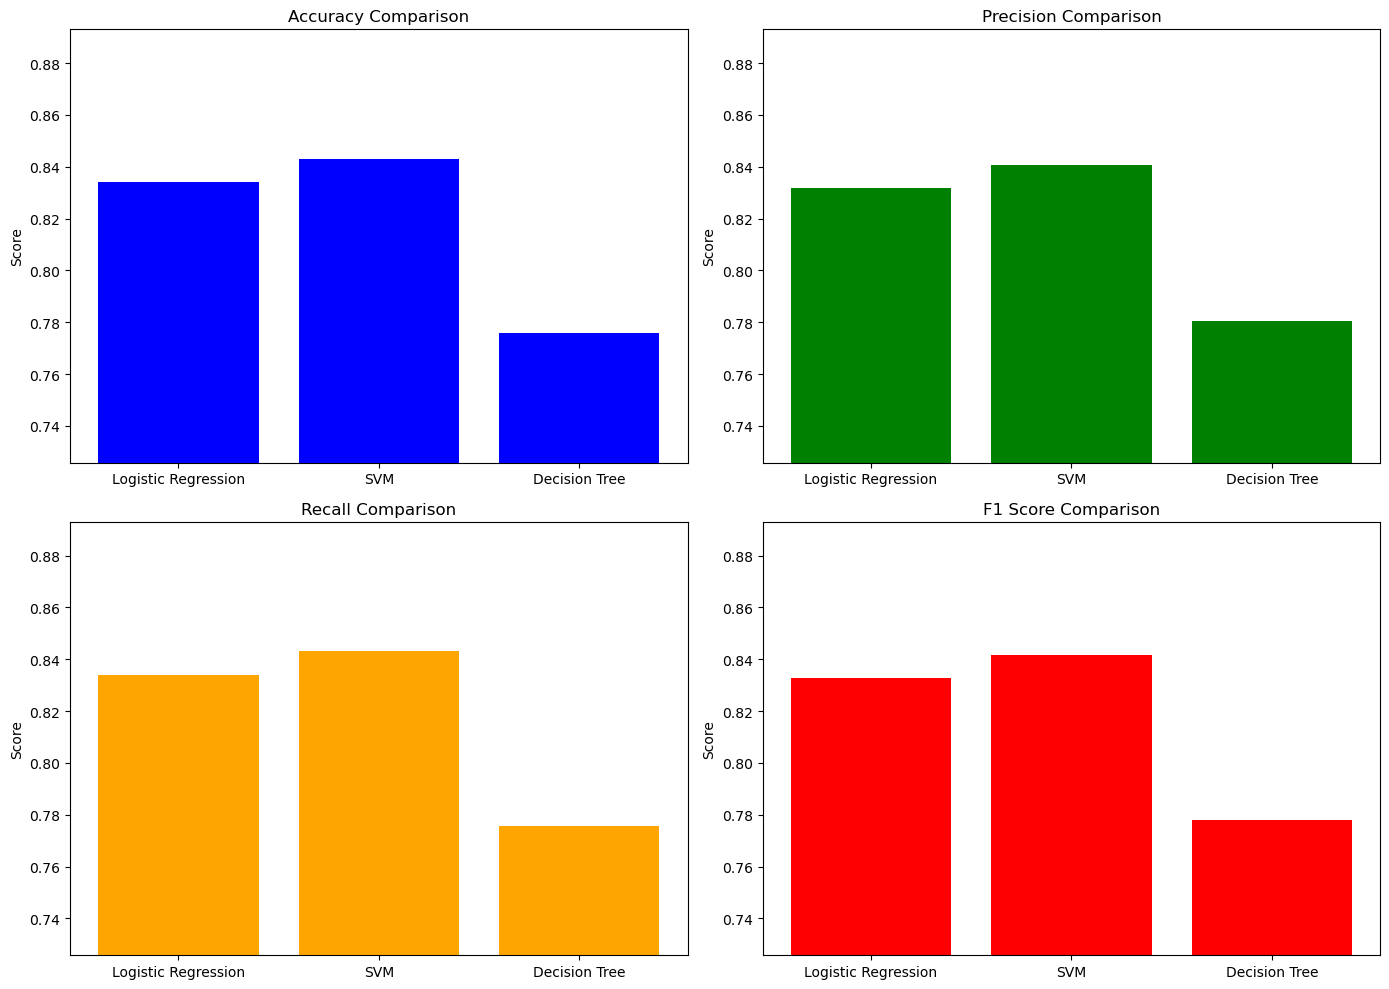

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, LinearSVC, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

# Initialize Spark Session
spark = SparkSession.builder.appName('Diabetes_Classification').getOrCreate()
print('Spark Version:', spark.version)

# Load the dataset
dataset = spark.read.csv("diabetes_dataset-Decision tree.csv", header=True, inferSchema=True)
dataset.show(10)
dataset.printSchema()

# Select and clean relevant features (adjust column names as per the dataset)
data = dataset.select(
    col("Pregnancies").cast("double"),
    col("Glucose").cast("double"),
    col("BloodPressure").cast("double"),
    col("SkinThickness").cast("double"),
    col("Insulin").cast("double"),
    col("BMI").cast("double"),
    col("DiabetesPedigreeFunction").cast("double"),
    col("Age").cast("double"),
    col("Outcome").cast("double")
).na.drop()

# Assemble features into a vector
vec_assembler = VectorAssembler(
    inputCols=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", 
               "DiabetesPedigreeFunction", "Age"],
    outputCol='features'
)
final_data = vec_assembler.transform(data)

# Select final data for modeling
final_data = final_data.select("features", "Outcome")
final_data.show(10)

# Split the data into training and testing sets
train_data, test_data = final_data.randomSplit([0.7, 0.3])

# Evaluator for models
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction")

# Logistic Regression
log_reg = LogisticRegression(labelCol="Outcome", featuresCol="features")
log_reg_model = log_reg.fit(train_data)
log_reg_predictions = log_reg_model.transform(test_data)

# Logistic Regression Evaluation
log_reg_accuracy = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "accuracy"})
log_reg_precision = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedPrecision"})
log_reg_recall = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedRecall"})
log_reg_f1 = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "f1"})

# Support Vector Machine
svm = LinearSVC(labelCol="Outcome", featuresCol="features")
svm_model = svm.fit(train_data)
svm_predictions = svm_model.transform(test_data)

# SVM Evaluation
svm_accuracy = evaluator.evaluate(svm_predictions, {evaluator.metricName: "accuracy"})
svm_precision = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedPrecision"})
svm_recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedRecall"})
svm_f1 = evaluator.evaluate(svm_predictions, {evaluator.metricName: "f1"})

# Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol="Outcome", featuresCol="features")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Decision Tree Evaluation
dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})

# Print Results
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Logistic Regression Precision: {log_reg_precision}")
print(f"Logistic Regression Recall: {log_reg_recall}")
print(f"Logistic Regression F1 Score: {log_reg_f1}")

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
print(f"SVM F1 Score: {svm_f1}")

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Precision: {dt_precision}")
print(f"Decision Tree Recall: {dt_recall}")
print(f"Decision Tree F1 Score: {dt_f1}")

# Visualization
methods = ["Logistic Regression", "SVM", "Decision Tree"]
accuracy = [log_reg_accuracy, svm_accuracy, dt_accuracy]
precision = [log_reg_precision, svm_precision, dt_precision]
recall = [log_reg_recall, svm_recall, dt_recall]
f1_score = [log_reg_f1, svm_f1, dt_f1]

plt.figure(figsize=(14, 10))
y_max = max(max(accuracy), max(precision), max(recall), max(f1_score)) + 0.05
y_min = min(min(accuracy), min(precision), min(recall), min(f1_score)) - 0.05

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.bar(methods, accuracy, color='blue')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Accuracy Comparison')

# Plot Precision
plt.subplot(2, 2, 2)
plt.bar(methods, precision, color='green')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Precision Comparison')

# Plot Recall
plt.subplot(2, 2, 3)
plt.bar(methods, recall, color='orange')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Recall Comparison')

# Plot F1 Score
plt.subplot(2, 2, 4)
plt.bar(methods, f1_score, color='red')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()

# Stop the Spark session
spark.stop()


#  Iris-Decision Tree.csv

Spark Version: 3.5.3
+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 10 rows

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: do

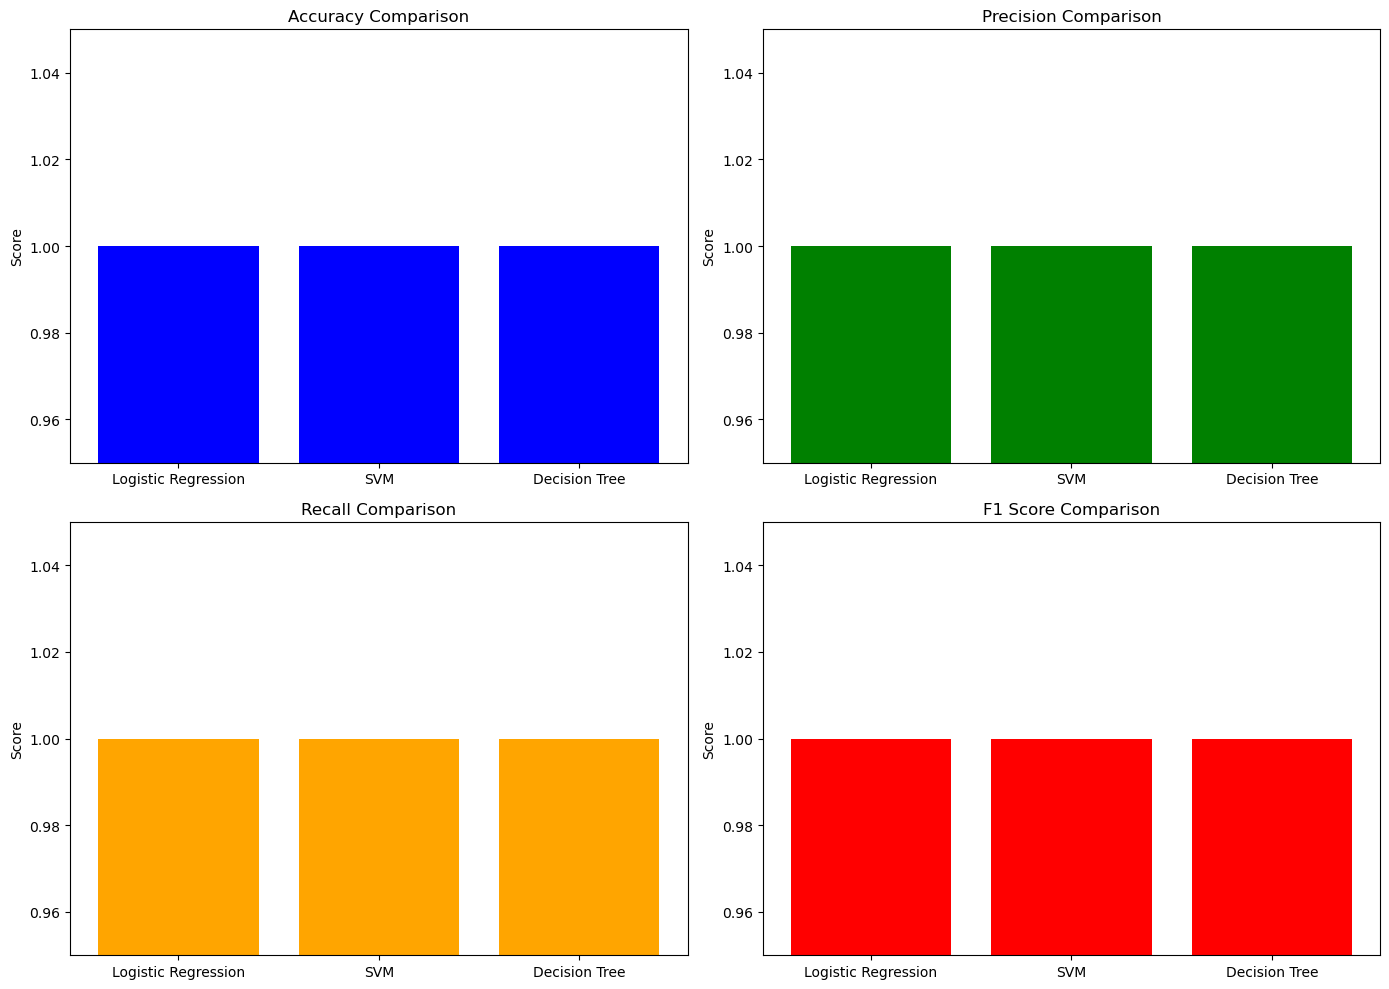

In [15]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression, LinearSVC, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

# Initialize Spark Session
spark = SparkSession.builder.appName('Iris_Classification').getOrCreate()
print('Spark Version:', spark.version)

# Load the dataset
dataset = spark.read.csv("Iris-Decision Tree.csv", header=True, inferSchema=True)
dataset.show(10)
dataset.printSchema()

# Select and clean relevant features
data = dataset.select(
    col("sepal_length").cast("double"),
    col("sepal_width").cast("double"),
    col("petal_length").cast("double"),
    col("petal_width").cast("double"),
    col("species").cast("string")
)

# Filter dataset to include only two classes for SVM (e.g., "setosa" and "versicolor")
filtered_data = data.filter((col("species") == "setosa") | (col("species") == "versicolor"))

# Convert categorical feature (species) into numeric values using StringIndexer
indexer = StringIndexer(inputCol="species", outputCol="label")
data = indexer.fit(filtered_data).transform(filtered_data)

# Assemble features into a vector
vec_assembler = VectorAssembler(
    inputCols=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    outputCol='features'
)
final_data = vec_assembler.transform(data)

# Select final data for modeling
final_data = final_data.select("features", "label")
final_data.show(10)

# Split the data into training and testing sets
train_data, test_data = final_data.randomSplit([0.7, 0.3])

# Evaluator for models
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Logistic Regression
log_reg = LogisticRegression(labelCol="label", featuresCol="features")
log_reg_model = log_reg.fit(train_data)
log_reg_predictions = log_reg_model.transform(test_data)

# Logistic Regression Evaluation
log_reg_accuracy = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "accuracy"})
log_reg_precision = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedPrecision"})
log_reg_recall = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedRecall"})
log_reg_f1 = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "f1"})

# Support Vector Machine
svm = LinearSVC(labelCol="label", featuresCol="features")
svm_model = svm.fit(train_data)
svm_predictions = svm_model.transform(test_data)

# SVM Evaluation
svm_accuracy = evaluator.evaluate(svm_predictions, {evaluator.metricName: "accuracy"})
svm_precision = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedPrecision"})
svm_recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedRecall"})
svm_f1 = evaluator.evaluate(svm_predictions, {evaluator.metricName: "f1"})

# Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Decision Tree Evaluation
dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})

# Print Results
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Logistic Regression Precision: {log_reg_precision}")
print(f"Logistic Regression Recall: {log_reg_recall}")
print(f"Logistic Regression F1 Score: {log_reg_f1}")

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
print(f"SVM F1 Score: {svm_f1}")

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Precision: {dt_precision}")
print(f"Decision Tree Recall: {dt_recall}")
print(f"Decision Tree F1 Score: {dt_f1}")

# Visualization
methods = ["Logistic Regression", "SVM", "Decision Tree"]
accuracy = [log_reg_accuracy, svm_accuracy, dt_accuracy]
precision = [log_reg_precision, svm_precision, dt_precision]
recall = [log_reg_recall, svm_recall, dt_recall]
f1_score = [log_reg_f1, svm_f1, dt_f1]

plt.figure(figsize=(14, 10))
y_max = max(max(accuracy), max(precision), max(recall), max(f1_score)) + 0.05
y_min = min(min(accuracy), min(precision), min(recall), min(f1_score)) - 0.05

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.bar(methods, accuracy, color='blue')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Accuracy Comparison')

# Plot Precision
plt.subplot(2, 2, 2)
plt.bar(methods, precision, color='green')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Precision Comparison')

# Plot Recall
plt.subplot(2, 2, 3)
plt.bar(methods, recall, color='orange')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Recall Comparison')

# Plot F1 Score
plt.subplot(2, 2, 4)
plt.bar(methods, f1_score, color='red')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()

# Stop the Spark session
spark.stop()


Spark Version: 3.5.3
+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 10 rows

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: do

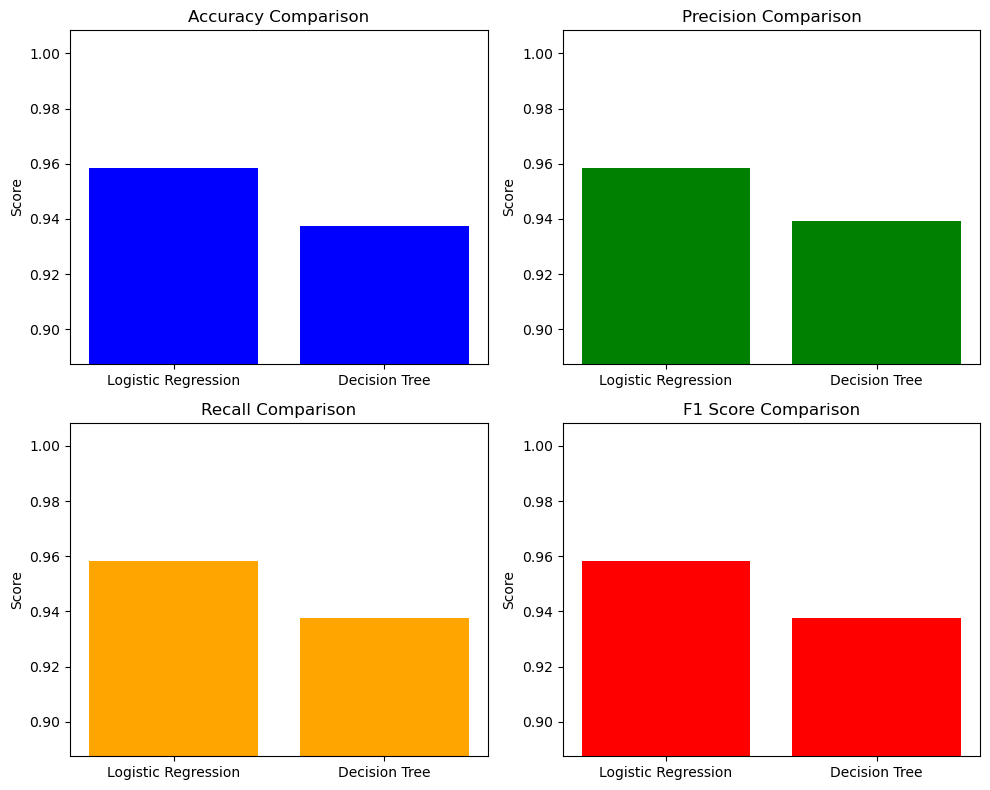

In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

# Initialize Spark Session
spark = SparkSession.builder.appName('Iris_Classification').getOrCreate()
print('Spark Version:', spark.version)

# Load the dataset
dataset = spark.read.csv("Iris-Decision Tree.csv", header=True, inferSchema=True)
dataset.show(10)
dataset.printSchema()

# Select and clean relevant features
data = dataset.select(
    col("sepal_length").cast("double"),
    col("sepal_width").cast("double"),
    col("petal_length").cast("double"),
    col("petal_width").cast("double"),
    col("species").cast("string")
)

# Convert categorical feature (species) into numeric values using StringIndexer
indexer = StringIndexer(inputCol="species", outputCol="label")
data = indexer.fit(data).transform(data)

# Assemble features into a vector
vec_assembler = VectorAssembler(
    inputCols=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    outputCol='features'
)
final_data = vec_assembler.transform(data)

# Select final data for modeling
final_data = final_data.select("features", "label")
final_data.show(10)

# Split the data into training and testing sets
train_data, test_data = final_data.randomSplit([0.7, 0.3])

# Evaluator for models
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Logistic Regression
log_reg = LogisticRegression(labelCol="label", featuresCol="features")
log_reg_model = log_reg.fit(train_data)
log_reg_predictions = log_reg_model.transform(test_data)

# Logistic Regression Evaluation
log_reg_accuracy = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "accuracy"})
log_reg_precision = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedPrecision"})
log_reg_recall = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedRecall"})
log_reg_f1 = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "f1"})

# Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Decision Tree Evaluation
dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})

# Print Results
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Logistic Regression Precision: {log_reg_precision}")
print(f"Logistic Regression Recall: {log_reg_recall}")
print(f"Logistic Regression F1 Score: {log_reg_f1}")

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Precision: {dt_precision}")
print(f"Decision Tree Recall: {dt_recall}")
print(f"Decision Tree F1 Score: {dt_f1}")

# Visualization
methods = ["Logistic Regression", "Decision Tree"]
accuracy = [log_reg_accuracy, dt_accuracy]
precision = [log_reg_precision, dt_precision]
recall = [log_reg_recall, dt_recall]
f1_score = [log_reg_f1, dt_f1]

plt.figure(figsize=(10, 8))
y_max = max(max(accuracy), max(precision), max(recall), max(f1_score)) + 0.05
y_min = min(min(accuracy), min(precision), min(recall), min(f1_score)) - 0.05

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.bar(methods, accuracy, color='blue')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Accuracy Comparison')

# Plot Precision
plt.subplot(2, 2, 2)
plt.bar(methods, precision, color='green')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Precision Comparison')

# Plot Recall
plt.subplot(2, 2, 3)
plt.bar(methods, recall, color='orange')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Recall Comparison')

# Plot F1 Score
plt.subplot(2, 2, 4)
plt.bar(methods, f1_score, color='red')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()

# Stop the Spark session
spark.stop()


# UniversalBank-SVM.csv

Spark Version: 3.5.3
+---+---+----------+------+--------+------+-----+---------+--------+-------------+------------------+----------+------+----------+
| ID|Age|Experience|Income|ZIP Code|Family|CCAvg|Education|Mortgage|Personal Loan|Securities Account|CD Account|Online|CreditCard|
+---+---+----------+------+--------+------+-----+---------+--------+-------------+------------------+----------+------+----------+
|  1| 25|         1|    49|   91107|     4|  1.6|        1|       0|            0|                 1|         0|     0|         0|
|  2| 45|        19|    34|   90089|     3|  1.5|        1|       0|            0|                 1|         0|     0|         0|
|  3| 39|        15|    11|   94720|     1|  1.0|        1|       0|            0|                 0|         0|     0|         0|
|  4| 35|         9|   100|   94112|     1|  2.7|        2|       0|            0|                 0|         0|     0|         0|
|  5| 35|         8|    45|   91330|     4|  1.0|        2|   

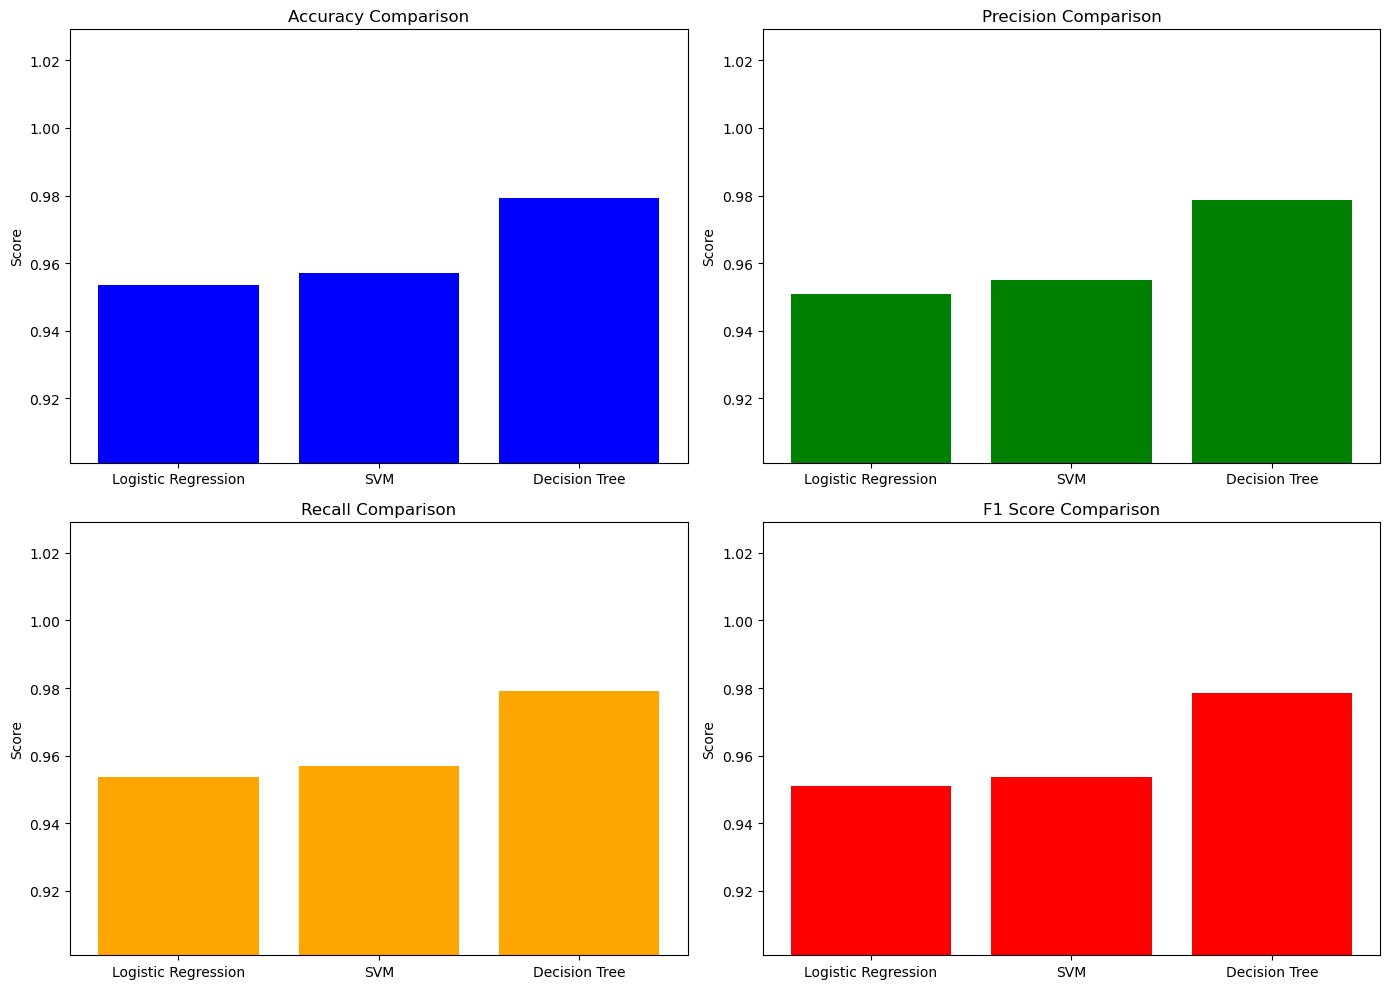

In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, LinearSVC, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

# Initialize Spark Session
spark = SparkSession.builder.appName('UniversalBank_Classification').getOrCreate()
print('Spark Version:', spark.version)

# Load the dataset
dataset = spark.read.csv("UniversalBank-SVM.csv", header=True, inferSchema=True)
dataset.show(10)
dataset.printSchema()

# Select and clean relevant features (adjust column names as per the dataset)
data = dataset.select(
    col("Age").cast("double"),
    col("Experience").cast("double"),
    col("Income").cast("double"),
    col("Family").cast("double"),
    col("CCAvg").cast("double"),
    col("Education").cast("double"),
    col("Mortgage").cast("double"),
    col("Securities Account").cast("double"),
    col("CD Account").cast("double"),
    col("Online").cast("double"),
    col("CreditCard").cast("double"),
    col("Personal Loan").cast("double").alias("label")  # Target variable
)

# Assemble features into a vector
vec_assembler = VectorAssembler(
    inputCols=["Age", "Experience", "Income", "Family", "CCAvg", "Education", 
               "Mortgage", "Securities Account", "CD Account", "Online", "CreditCard"],
    outputCol='features'
)
final_data = vec_assembler.transform(data)

# Select final data for modeling
final_data = final_data.select("features", "label")
final_data.show(10)

# Split the data into training and testing sets
train_data, test_data = final_data.randomSplit([0.7, 0.3])

# Evaluator for models
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Logistic Regression
log_reg = LogisticRegression(labelCol="label", featuresCol="features")
log_reg_model = log_reg.fit(train_data)
log_reg_predictions = log_reg_model.transform(test_data)

# Logistic Regression Evaluation
log_reg_accuracy = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "accuracy"})
log_reg_precision = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedPrecision"})
log_reg_recall = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedRecall"})
log_reg_f1 = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "f1"})

# Support Vector Machine
svm = LinearSVC(labelCol="label", featuresCol="features")
svm_model = svm.fit(train_data)
svm_predictions = svm_model.transform(test_data)

# SVM Evaluation
svm_accuracy = evaluator.evaluate(svm_predictions, {evaluator.metricName: "accuracy"})
svm_precision = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedPrecision"})
svm_recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedRecall"})
svm_f1 = evaluator.evaluate(svm_predictions, {evaluator.metricName: "f1"})

# Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Decision Tree Evaluation
dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})

# Print Results
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Logistic Regression Precision: {log_reg_precision}")
print(f"Logistic Regression Recall: {log_reg_recall}")
print(f"Logistic Regression F1 Score: {log_reg_f1}")

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
print(f"SVM F1 Score: {svm_f1}")

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Precision: {dt_precision}")
print(f"Decision Tree Recall: {dt_recall}")
print(f"Decision Tree F1 Score: {dt_f1}")

# Visualization
methods = ["Logistic Regression", "SVM", "Decision Tree"]
accuracy = [log_reg_accuracy, svm_accuracy, dt_accuracy]
precision = [log_reg_precision, svm_precision, dt_precision]
recall = [log_reg_recall, svm_recall, dt_recall]
f1_score = [log_reg_f1, svm_f1, dt_f1]

plt.figure(figsize=(14, 10))
y_max = max(max(accuracy), max(precision), max(recall), max(f1_score)) + 0.05
y_min = min(min(accuracy), min(precision), min(recall), min(f1_score)) - 0.05

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.bar(methods, accuracy, color='blue')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Accuracy Comparison')

# Plot Precision
plt.subplot(2, 2, 2)
plt.bar(methods, precision, color='green')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Precision Comparison')

# Plot Recall
plt.subplot(2, 2, 3)
plt.bar(methods, recall, color='orange')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Recall Comparison')

# Plot F1 Score
plt.subplot(2, 2, 4)
plt.bar(methods, f1_score, color='red')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()

# Stop the Spark session
spark.stop()


# Banking - Decision Tree.csv

Spark Version: 3.5.3
+---+-----------+--------+-----------------+-------+-------+----+--------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|        education|default|housing|loan| contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-----------+--------+-----------------+-------+-------+----+--------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 44|blue-collar| married|         basic.4y|unknown|    yes|  no|cellular|  aug|        thu|     210|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     5228.1|  0|
| 53| technician| married|          unknown|     no|     no|  no|cellular|  nov|        fri|     138|       1|  999|       0|nonexistent|        -0.1|     

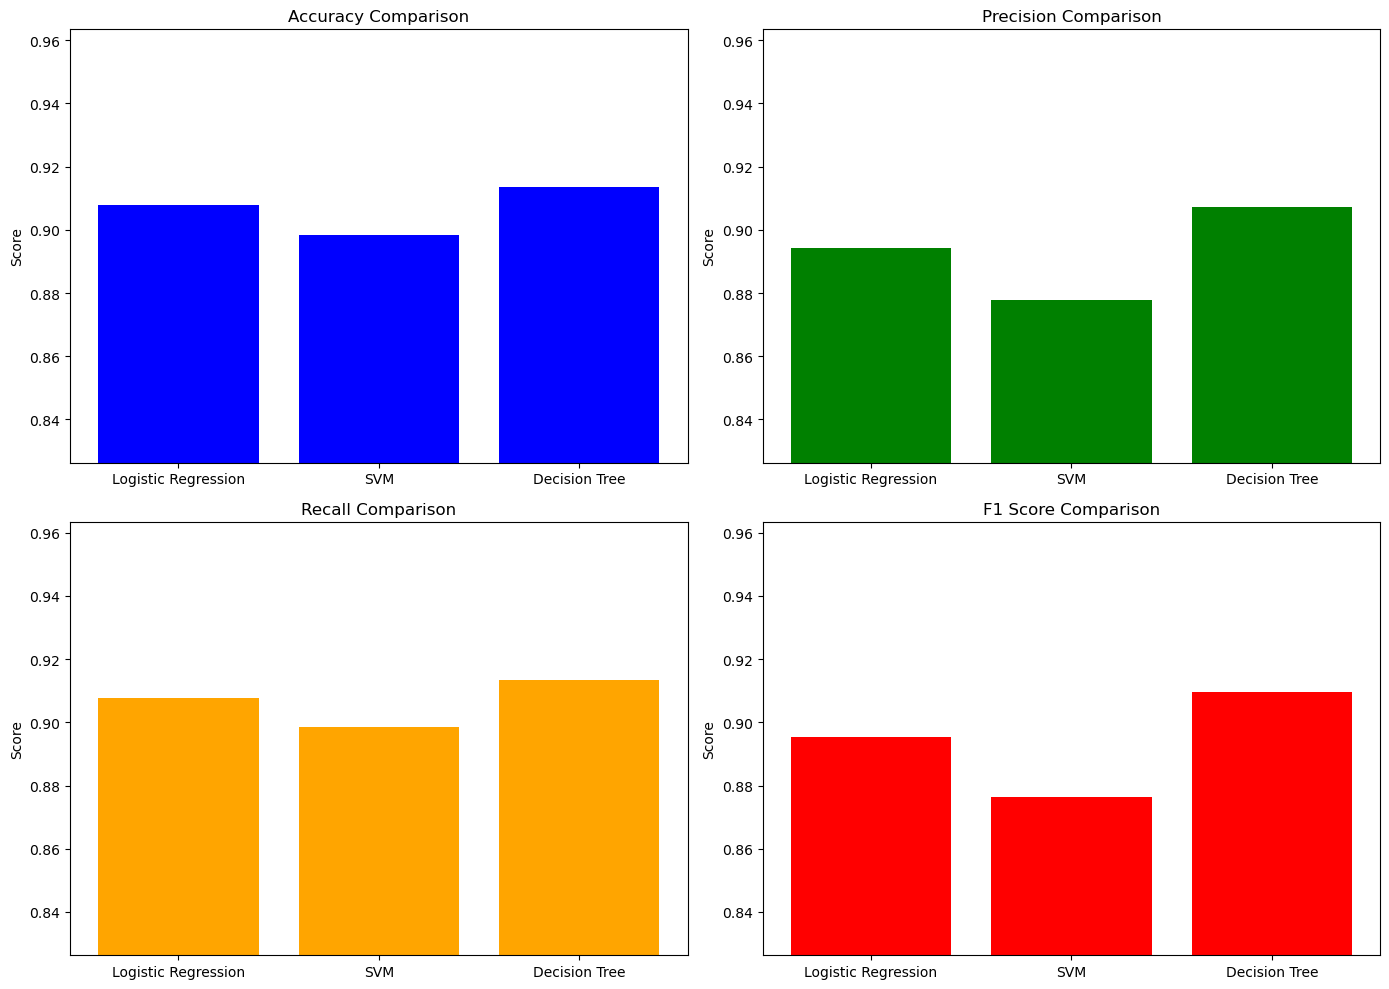

In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, LinearSVC, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

# Initialize Spark Session
spark = SparkSession.builder.appName('Banking_Classification').getOrCreate()
print('Spark Version:', spark.version)

# Load the dataset
dataset = spark.read.csv("Banking - Decision Tree.csv", header=True, inferSchema=True)
dataset.show(10)
dataset.printSchema()

# Select and clean relevant features (adjust column names as per the dataset)
data = dataset.select(
    col("age").cast("double"),
    col("duration").cast("double"),
    col("campaign").cast("double"),
    col("pdays").cast("double"),
    col("previous").cast("double"),
    col("emp_var_rate").cast("double"),
    col("cons_price_idx").cast("double"),
    col("cons_conf_idx").cast("double"),
    col("euribor3m").cast("double"),
    col("nr_employed").cast("double"),
    col("y").cast("double").alias("label")  # Target variable
)

# Assemble features into a vector
vec_assembler = VectorAssembler(
    inputCols=["age", "duration", "campaign", "pdays", "previous", 
               "emp_var_rate", "cons_price_idx", "cons_conf_idx", "euribor3m", "nr_employed"],
    outputCol='features'
)
final_data = vec_assembler.transform(data)

# Select final data for modeling
final_data = final_data.select("features", "label")
final_data.show(10)

# Split the data into training and testing sets
train_data, test_data = final_data.randomSplit([0.7, 0.3])

# Evaluator for models
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Logistic Regression
log_reg = LogisticRegression(labelCol="label", featuresCol="features")
log_reg_model = log_reg.fit(train_data)
log_reg_predictions = log_reg_model.transform(test_data)

# Logistic Regression Evaluation
log_reg_accuracy = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "accuracy"})
log_reg_precision = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedPrecision"})
log_reg_recall = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "weightedRecall"})
log_reg_f1 = evaluator.evaluate(log_reg_predictions, {evaluator.metricName: "f1"})

# Support Vector Machine
svm = LinearSVC(labelCol="label", featuresCol="features")
svm_model = svm.fit(train_data)
svm_predictions = svm_model.transform(test_data)

# SVM Evaluation
svm_accuracy = evaluator.evaluate(svm_predictions, {evaluator.metricName: "accuracy"})
svm_precision = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedPrecision"})
svm_recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedRecall"})
svm_f1 = evaluator.evaluate(svm_predictions, {evaluator.metricName: "f1"})

# Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Decision Tree Evaluation
dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})

# Print Results
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Logistic Regression Precision: {log_reg_precision}")
print(f"Logistic Regression Recall: {log_reg_recall}")
print(f"Logistic Regression F1 Score: {log_reg_f1}")

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
print(f"SVM F1 Score: {svm_f1}")

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Precision: {dt_precision}")
print(f"Decision Tree Recall: {dt_recall}")
print(f"Decision Tree F1 Score: {dt_f1}")

# Visualization
methods = ["Logistic Regression", "SVM", "Decision Tree"]
accuracy = [log_reg_accuracy, svm_accuracy, dt_accuracy]
precision = [log_reg_precision, svm_precision, dt_precision]
recall = [log_reg_recall, svm_recall, dt_recall]
f1_score = [log_reg_f1, svm_f1, dt_f1]

plt.figure(figsize=(14, 10))
y_max = max(max(accuracy), max(precision), max(recall), max(f1_score)) + 0.05
y_min = min(min(accuracy), min(precision), min(recall), min(f1_score)) - 0.05

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.bar(methods, accuracy, color='blue')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Accuracy Comparison')

# Plot Precision
plt.subplot(2, 2, 2)
plt.bar(methods, precision, color='green')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Precision Comparison')

# Plot Recall
plt.subplot(2, 2, 3)
plt.bar(methods, recall, color='orange')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('Recall Comparison')

# Plot F1 Score
plt.subplot(2, 2, 4)
plt.bar(methods, f1_score, color='red')
plt.ylim(y_min, y_max)
plt.ylabel('Score')
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()

# Stop the Spark session
spark.stop()
